#Proyecto Final de Aprendizaje Automático II
#Rivera Fuentes Fausto - 18330489

###Leer el dataset de diabetes y analizar su contenido

In [1]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv') 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###Se observa que no existen valores nulos para ser limpiados.

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###Se busca predecir Outcome, la variable que simboliza si una persona tiene diabetes por medio de los siguientes valores:

*   1 - Diagnóstico positivo
*   0 - Diagnóstico negativo



###Se separan las columnas que se utilizan para la predicción y la columna a predecir.

In [4]:
x = pd.DataFrame(df, columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 
                                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

y = df.Outcome.values.reshape(-1 , 1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


###Entrenamiento de 4 modelos para observar cual tiene mejor rendimiento

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 

  results = {}
    
    
  start = time() 
  learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
  end = time() 
    
  results['Tiempo de entrenamiento'] = end - start
          
  start = time() 
  predictions_test = learner.predict(X_test)
  predictions_train = learner.predict(X_train[:300])
  end = time() 
  results['Tiempo de predicción'] = end - start
              
  results['acc_Entrenamiento'] = accuracy_score(y_train[:300],predictions_train)
          
  results['acc_Prueba'] = accuracy_score(y_test,predictions_test)
     
  results['f_Entrenamiento'] = fbeta_score(y_train[:300],predictions_train,beta = 0.5)

  results['f_PRueba'] = fbeta_score(y_test,predictions_test, beta = 0.5)

  print("{} entrenado con {} muestras.".format(learner.__class__.__name__, sample_size))

  return results

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier


clf_A = GradientBoostingClassifier(random_state=101)
clf_B = RandomForestClassifier(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)
clf_D = BaggingClassifier(random_state= 101)


samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)


results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier entrenado con 6 muestras.
GradientBoostingClassifier entrenado con 61 muestras.


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier entrenado con 614 muestras.


<ipython-input-7-a6526e9863c7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  learner = learner.fit(X_train[:sample_size],y_train[:sample_size])


RandomForestClassifier entrenado con 6 muestras.


<ipython-input-7-a6526e9863c7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  learner = learner.fit(X_train[:sample_size],y_train[:sample_size])


RandomForestClassifier entrenado con 61 muestras.


<ipython-input-7-a6526e9863c7>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  learner = learner.fit(X_train[:sample_size],y_train[:sample_size])


RandomForestClassifier entrenado con 614 muestras.
AdaBoostClassifier entrenado con 6 muestras.


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier entrenado con 61 muestras.


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier entrenado con 614 muestras.
BaggingClassifier entrenado con 6 muestras.
BaggingClassifier entrenado con 61 muestras.
BaggingClassifier entrenado con 614 muestras.


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Impresión de resultados de los 4 clasificadores

In [9]:
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

GradientBoostingClassifier


,1%,10%,100%
Tiempo de entrenamiento,0.063544,0.272292,0.554986
Tiempo de predicción,0.008470,0.007299,0.007777
acc_Entrenamiento,0.646667,0.766667,0.930000
acc_Prueba,0.694805,0.759740,0.818182
f_Entrenamiento,0.502092,0.675241,0.919540
f_PRueba,0.477387,0.608856,0.702128


RandomForestClassifier


,1%,10%,100%
Tiempo de entrenamiento,0.492068,0.408690,0.757667
Tiempo de predicción,0.050380,0.155495,0.227432
acc_Entrenamiento,0.646667,0.766667,1.000000
acc_Prueba,0.701299,0.746753,0.805195
f_Entrenamiento,0.524055,0.684411,1.000000
f_PRueba,0.502283,0.585774,0.682819


AdaBoostClassifier


,1%,10%,100%
Tiempo de entrenamiento,0.020746,0.415340,0.415611
Tiempo de predicción,0.006109,0.093155,0.042157
acc_Entrenamiento,0.646667,0.733333,0.823333
acc_Prueba,0.694805,0.701299,0.779221
f_Entrenamiento,0.502092,0.634218,0.773092
f_PRueba,0.477387,0.535117,0.637860


BaggingClassifier


,1%,10%,100%
Tiempo de entrenamiento,0.028842,0.028617,0.050178
Tiempo de predicción,0.009735,0.017918,0.010664
acc_Entrenamiento,0.596667,0.760000,0.980000
acc_Prueba,0.668831,0.746753,0.811688
f_Entrenamiento,0.467213,0.668317,0.983146
f_PRueba,0.454545,0.591398,0.695067


###Matriz de confusión de los 4 clasificadores

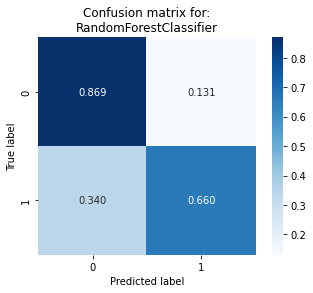

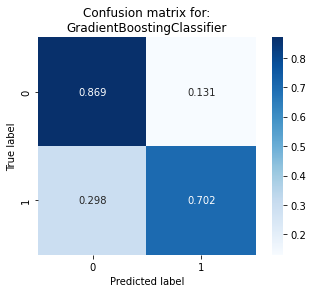

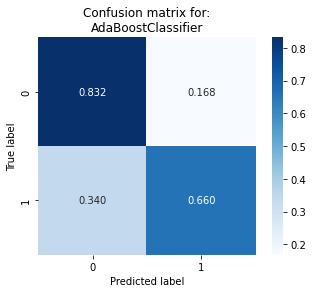

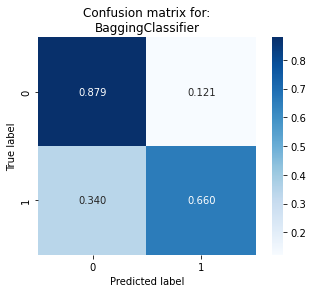

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))

for i,model in enumerate([clf_A,clf_B,clf_C,clf_D]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":10}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

###Búsqueda de los mejores hiperparámetros del clasificador que mostró mejor rendimiento.

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [16]:
GBR = GradientBoostingClassifier()

In [17]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [19]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [21]:
print("Mejores parámetros de GradientBoosting para este dataset.")
print("\n Mejor estimador fue:\n",grid_GBR.best_estimator_)
print("\n Mejor score fue:\n",grid_GBR.best_score_)
print("\n Los mejores parámetros fueron:\n",grid_GBR.best_params_)

Mejores parámetros de GradientBoosting para este dataset.

 Mejor estimador fue:
 GradientBoostingClassifier(learning_rate=0.04, max_depth=8, subsample=0.2)

 Mejor score fue:
 0.7703583061889251

 Los mejores parámetros fueron:
 {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.2}
